In [82]:
import csv
import datetime
import dateutil.parser
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
%matplotlib inline

In [83]:
def makeTurnstileFile(turn_file):
    
    turnstile = {}

    with open(turn_file, "r") as turnstile_file:
        reader = csv.reader(turnstile_file)

        reader.next()

        for row in reader:
            first_four = tuple(row[:5])
            end_values = row[4:-1]
            end_values.append(row[-1].rstrip())
            #could also use setdefault method with key, value pairs
            #creates list and appends at same time instead of if/else below
            if first_four in turnstile:
                turnstile[first_four].append(end_values)
            else:
                turnstile[first_four] = [end_values]
    
    return turnstile 

In [84]:
mar21_turn = makeTurnstileFile("turnstile_150321.txt")
mar14_turn = makeTurnstileFile("turnstile_150314.txt")
mar07_turn = makeTurnstileFile("turnstile_150307.txt")

In [4]:
def makeWeekdayPointTime(turnstile):
    
    point_time = {}

    for turn, v  in turnstile.iteritems():
        point_time[turn] = []
        for index, el in enumerate(v):
            date_val, time_val = el[2], el[3]
            time_stamp = date_val + ' ' + time_val
            time_stamp = time.strptime(time_stamp, "%m/%d/%Y %H:%M:%S")
            time_stamp = datetime.datetime(time_stamp[0], time_stamp[1], \
                                           time_stamp[2], time_stamp[3], \
                                           time_stamp[4], time_stamp[5])
            if index == 0 and time_stamp.weekday() in range(5):
                point_time[turn] = [(time_stamp, 0)]
            else:
                prev_row = v[index - 1]
                exits = int(el[6]) - int(prev_row[6])
                #only add positive entries.  assume there is something wrong with 
                #negative values.  also only add entries less than 20000 due to midday 
                #count resets.
                if exits >= 0 and exits < 20000 and time_stamp.weekday() in range(5) :
                    point_time[turn].append((time_stamp, exits))
                   
    return point_time

In [137]:
def makeWeekendPointTime(turnstile):
    
    point_time = {}

    for turn, v  in turnstile.iteritems():
        point_time[turn] = []
        for index, el in enumerate(v):
            date_val, time_val = el[2], el[3]
            time_stamp = date_val + ' ' + time_val
            time_stamp = time.strptime(time_stamp, "%m/%d/%Y %H:%M:%S")
            time_stamp = datetime.datetime(time_stamp[0], time_stamp[1], \
                                           time_stamp[2], time_stamp[3], \
                                           time_stamp[4], time_stamp[5])
            if index == 0 and time_stamp.weekday() in [5,6]:
                point_time[turn] = [(time_stamp, 0)]
            else:
                prev_row = v[index - 1]
                exits = int(el[6]) - int(prev_row[6])
                #only add positive entries.  assume there is something wrong with 
                #negative values.  also only add entries less than 20000 due to midday 
                #count resets.
                #if exits >= 0 and exits < 0000 and time_stamp.weekday() in [5,6] :
                point_time[turn].append((time_stamp, exits))
                   
    return point_time

In [6]:
mar21_weekday_point = makeWeekdayPointTime(mar21_turn)
mar14_weekday_point = makeWeekdayPointTime(mar14_turn)
mar07_weekday_point = makeWeekdayPointTime(mar07_turn)

In [49]:
#mar07_weekday_point

In [138]:
mar21_weekend_point = makeWeekendPointTime(mar21_turn)
mar14_weekend_point = makeWeekendPointTime(mar14_turn)
mar07_weekend_point = makeWeekendPointTime(mar07_turn)

In [51]:
#mar07_weekend_point

In [87]:
def makeDailyPerTurnstile(point_time):
    
    daily = {}
    
    for turn, v in point_time.iteritems():
        day_tracker = {}
        for el in v:
            day = (str(el[0].date()), str(el[0].time()))
            count = el[1]
            day_tracker[day] = day_tracker.get(day,0) + count
        daily[turn] = sorted(day_tracker.items())
    
    return daily

In [9]:
mar21_weekday_daily = makeDailyPerTurnstile(mar21_weekday_point)
mar14_weekday_daily = makeDailyPerTurnstile(mar14_weekday_point)
mar07_weekday_daily = makeDailyPerTurnstile(mar07_weekday_point)

In [140]:
mar21_weekend_daily = makeDailyPerTurnstile(mar21_weekend_point)
mar14_weekend_daily = makeDailyPerTurnstile(mar14_weekend_point)
mar07_weekend_daily = makeDailyPerTurnstile(mar07_weekend_point)

<h2>Analysis Done Below<h2>

Stations of interest:
    47-50 ST because its on weekday and not weekend most likely due to tourists using grand central as an exit point to get to rockefeller center.  The weekly riders should be more aligned with native New Yorkers.  Graph below shows distribution of riders based on hour of day.
    Main Street out in Queens because of the commuter rail.  Time analysis shows more people exiting station in the evening signaling more commuters going home.  Create graph.
    86th street lexington avenue.  The 4,5,6 line carries a large amount of people, esp commuters and this is reflected in the weekly ridership graph, which continues even higher into the evening hours signaling potential commuters.  Morning is high as well but may reflect museum goers instead.
    West 4th street for a possible weekend destination as more exits are occurring in the evening time.  Quite a bit less people on the weekends though.  Would need some further analysis to show figure out how to target a potential demographic.
    Lexington Ave. 53rd street is similar to 47-50 ST because it is on weekday but not weekend.  Could be due to Queens people commuting in?


In [177]:
#for k, v in mar07_weekend_daily.iteritems():
#    if k[3]  == "47-50 ST-ROCK":
#        for el in v:
#            print k[3], el[0][1], el[1]
#mar07_weekend_daily

In [109]:
def makeComboTurnstiles(daily):
    
    combo = {}

    for k, v in daily.iteritems():
        if (k[0], k[1], k[3]) in combo:
            combo[(k[0], k[1], k[3])].extend(v[:])
        else:
            combo[(k[0], k[1], k[3])] = v[:]
    
    for k, v in combo.iteritems():
        c = {}
        for el in v:
            #day = el[0]
            time = el[0][1]
            count = el[1]
            #c[day] = c.get(day,0) + count
            c[time] = c.get(time,0) + count
        combo[k] = sorted(c.items())
    
    return combo   

In [110]:
mar21_combo = makeComboTurnstiles(mar21_daily)
mar14_combo = makeComboTurnstiles(mar14_daily)
mar07_combo = makeComboTurnstiles(mar07_daily)

NameError: name 'mar21_daily' is not defined

In [61]:
def makeStation(daily):
    
    station = {}

    for k, v in daily.iteritems():
        if (k[3],k[4]) in station:
            station[(k[3],k[4])].extend(v[:])
        else:
            station[(k[3],k[4])] = v[:]
    
    for k, v in station.iteritems():
        c = {}
        for el in v:
            day = el[0][0]
            #time = el[0][1]
            count = el[1]
            c[day] = c.get(day,0) + count
            #c[time] = c.get(time,0) + count
        station[k] = sorted(c.items())
        
    return station   

In [62]:
mar21_weekday_station = makeStation(mar21_weekday_daily)
mar14_weekday_station = makeStation(mar14_weekday_daily)
mar07_weekday_station = makeStation(mar07_weekday_daily)

In [131]:
mar21_weekend_station = makeStation(mar21_weekend_daily)
mar14_weekend_station = makeStation(mar14_weekend_daily)
mar07_weekend_station = makeStation(mar07_weekend_daily)

In [65]:
week_stations = []
for mta_file in [mar21_weekday_station, mar14_weekday_station, mar07_weekday_station]:
    week_vals = sorted(mta_file[("LEXINGTON-53 ST","EM6")])
    station_week = []
    for el in week_vals:
        station_week.append(el[1])
    week_stations.append(station_week)

In [66]:
week_stations

[[47756, 52352, 50965, 51086, 49616],
 [49283, 54717, 50997, 52367, 50670],
 [48144, 51957, 52161, 47575, 50497]]

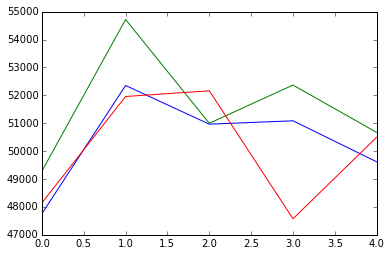

In [67]:
for week in week_stations:
    plt.plot(week)

In [42]:
rock_hour = []
lex_hour = []
w4_hour = []
east_86_hour = []
main_hour = []
east_86_hour_weekend = []
main_hour_weekend = []
herald_hour = []

for station_week in [mar07_weekday_station, mar14_weekday_station, mar21_weekday_station]:
    for k, v in station_week.iteritems():
        if k[0] == "47-50 ST-ROCK":
            rock_hour.append(v)
        elif k[0] == "LEXINGTON-53 ST":
            lex_hour.append(v)
        elif k == ("86 ST", "456"):
            east_86_hour.append(v)
        elif k[0] == "MAIN ST":
            main_hour.append(v)
            
for station_week in [mar07_weekend_station, mar14_weekend_station, mar21_weekend_station]:
    for k, v in station_week.iteritems():
        if k[0] == "W 4 ST-WASH SQ":
            w4_hour.append(v)
        elif k == ("86 ST", "456"):
            east_86_hour_weekend.append(v)
        elif k[0] == "MAIN ST":
            main_hour_weekend.append(v)
        elif k[0] == "34 ST-HERALD SQ":
            herald_hour.append(v)

In [43]:
east_86_hour_07, east_86_counts_07 = zip(*east_86_hour[0])
east_86_hour_14, east_86_counts_14 = zip(*east_86_hour[1])
east_86_hour_21, east_86_counts_21 = zip(*east_86_hour[2])

east_86_hour_07 = [dateutil.parser.parse(east_86_hour_07[i]).time() for i in range(len(east_86_hour_07))]
east_86_hour_14 = [dateutil.parser.parse(east_86_hour_14[i]).time() for i in range(len(east_86_hour_14))]
east_86_hour_21 = [dateutil.parser.parse(east_86_hour_21[i]).time() for i in range(len(east_86_hour_21))]

In [44]:
main_hour_07, main_counts_07 = zip(*main_hour[0])
main_hour_14, main_counts_14 = zip(*main_hour[1])
main_hour_21, main_counts_21 = zip(*main_hour[2])

main_hour_07 = [dateutil.parser.parse(main_hour_07[i]).time() for i in range(len(main_hour_07))]
main_hour_14 = [dateutil.parser.parse(main_hour_14[i]).time() for i in range(len(main_hour_14))]
main_hour_21 = [dateutil.parser.parse(main_hour_21[i]).time() for i in range(len(main_hour_21))]

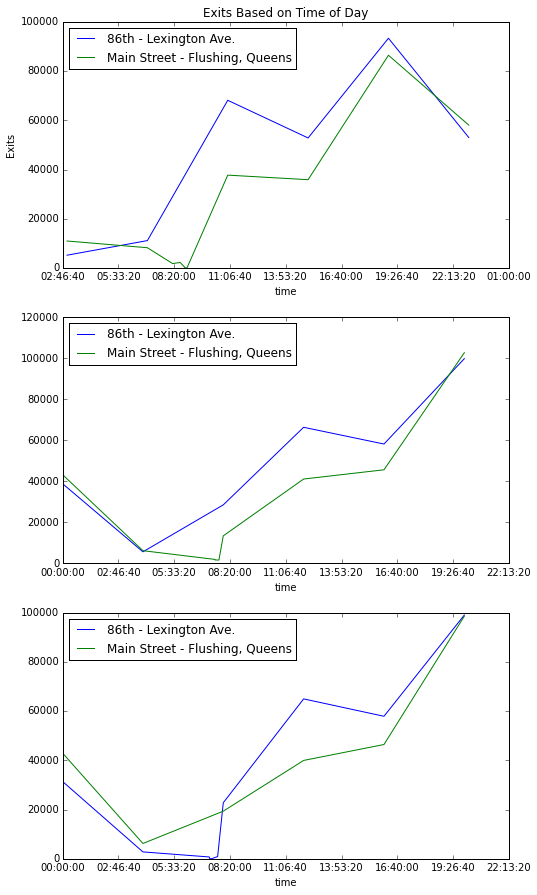

In [45]:
plt.figure(figsize=(8,15)) 
plt.subplot(311)
plt.plot(east_86_hour_07, east_86_counts_07, label="86th - Lexington Ave.")
plt.plot(main_hour_07, main_counts_07, label="Main Street - Flushing, Queens")
plt.legend(loc='best')
plt.ylabel("Exits")
plt.title("Exits Based on Time of Day")
plt.subplot(312)
plt.plot(east_86_hour_14, east_86_counts_14, label="86th - Lexington Ave.")
plt.plot(main_hour_14, main_counts_14, label="Main Street - Flushing, Queens")
plt.legend(loc='best')
plt.subplot(313)
plt.plot(east_86_hour_21, east_86_counts_21, label="86th - Lexington Ave.")
plt.plot(main_hour_21, main_counts_21, label="Main Street - Flushing, Queens")
plt.legend(loc='best')

In [140]:
#east_86_hour
#east_86_hour_weekend
# 7-11 am crowd more museum people while 3-6 pm more people arriving home from work.
#very busy line and an express stop far from midtown

In [46]:
rock_hour_07, rock_counts_07 = zip(*rock_hour[0])
rock_hour_14, rock_counts_14 = zip(*rock_hour[1])
rock_hour_21, rock_counts_21 = zip(*rock_hour[2])

lex_hour_07, lex_counts_07 = zip(*lex_hour[0])
lex_hour_14, lex_counts_14 = zip(*lex_hour[1])
lex_hour_21, lex_counts_21 = zip(*lex_hour[2])

rock_hour_07 = [dateutil.parser.parse(rock_hour_07[i]).time() for i in range(len(rock_hour_07))]
rock_hour_14 = [dateutil.parser.parse(rock_hour_14[i]).time() for i in range(len(rock_hour_14))]
rock_hour_21 = [dateutil.parser.parse(rock_hour_21[i]).time() for i in range(len(rock_hour_21))]

lex_hour_07 = [dateutil.parser.parse(lex_hour_07[i]).time() for i in range(len(lex_hour_07))]
lex_hour_14 = [dateutil.parser.parse(lex_hour_14[i]).time() for i in range(len(lex_hour_14))]
lex_hour_21 = [dateutil.parser.parse(lex_hour_21[i]).time() for i in range(len(lex_hour_21))]

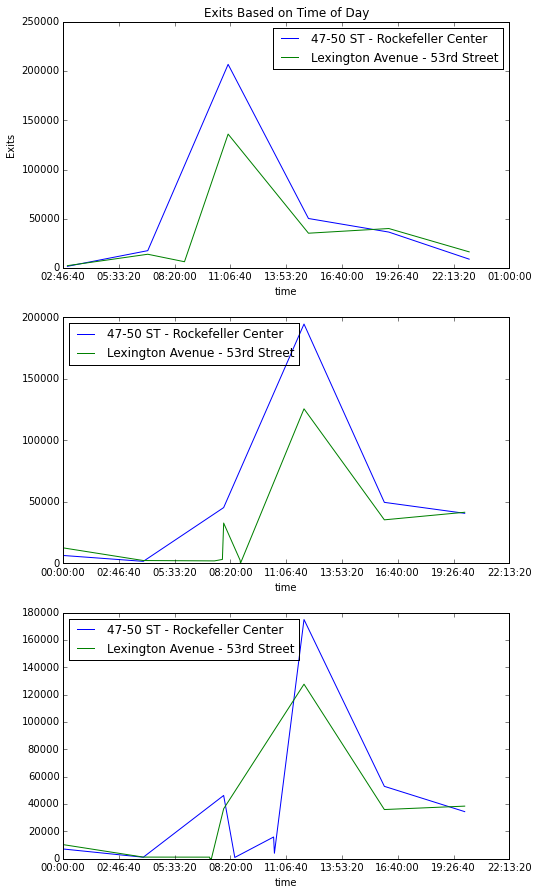

In [47]:
plt.figure(figsize=(8,15)) 
plt.subplot(311)
plt.plot(rock_hour_07, rock_counts_07, label="47-50 ST - Rockefeller Center")
plt.plot(lex_hour_07, lex_counts_07, label="Lexington Avenue - 53rd Street")
plt.ylabel("Exits")
plt.legend(loc='best')
plt.title("Exits Based on Time of Day")
plt.subplot(312)
plt.plot(rock_hour_14, rock_counts_14, label="47-50 ST - Rockefeller Center")
plt.plot(lex_hour_14, lex_counts_14, label="Lexington Avenue - 53rd Street")
plt.legend(loc='best')
plt.subplot(313)
plt.plot(rock_hour_21, rock_counts_21, label="47-50 ST - Rockefeller Center")
plt.plot(lex_hour_21, lex_counts_21, label="Lexington Avenue - 53rd Street")
plt.legend(loc='best')

In [410]:
data = mar21_weekend_station.values()
data2 = mar21_weekday_station.values()
one_station = data[0]
two_station = data2[0]
print one_station, two_station

[('2015-03-14', 5501), ('2015-03-15', 5326)] [('2015-03-16', 8505), ('2015-03-17', 9189), ('2015-03-18', 8847), ('2015-03-19', 9086), ('2015-03-20', 8825)]


In [112]:
def makeWeekStation(station):
    
    station_week_total = {}

    for k, v in station.iteritems():
        stat_tot = 0
        for el in v:
            stat_tot += el[1]
        station_week_total[k] = stat_tot
        
    return station_week_total

In [70]:
mar21_multi_weekday = makeWeekStation(mar21_weekday_station)
mar14_multi_weekday = makeWeekStation(mar14_weekday_station)
mar07_multi_weekday = makeWeekStation(mar07_weekday_station)

In [132]:
mar21_multi_weekend = makeWeekStation(mar21_weekend_station)
mar14_multi_weekend = makeWeekStation(mar14_weekend_station)
mar07_multi_weekend = makeWeekStation(mar07_weekend_station)

In [114]:
#loops through 
weekday_station_totals = {}

for station_weeks in [mar21_multi_weekday, mar14_multi_weekday, mar07_multi_weekday]:
    for k, v in station_weeks.iteritems():
        weekday_station_totals[k] = weekday_station_totals.get(k,0) + v

In [133]:
#loops through 
weekend_station_totals = {}

for station_weeks in [mar21_multi_weekend, mar14_multi_weekend, mar07_multi_weekend]:
    for k, v in station_weeks.iteritems():
        weekend_station_totals[k] = weekend_station_totals.get(k,0) + v

In [74]:
total_weekday_stations = weekday_station_totals.items()
total_weekday_stations = sorted(total_weekday_stations, key=lambda station: station[1])

In [134]:
total_weekend_stations = weekend_station_totals.items()
total_weekend_stations = sorted(total_weekend_stations, key=lambda station: station[1])

In [135]:
weekday_station_name, tot_weekday_ridership = zip(*total_weekday_stations)
weekend_station_name, tot_weekend_ridership = zip(*total_weekend_stations)

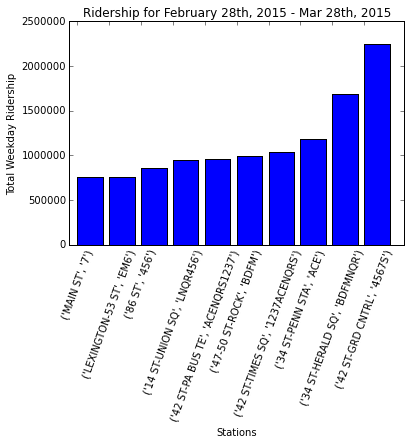

In [80]:
indices = range(len(tot_weekday_ridership[-10:]))
plt.bar(indices, tot_weekday_ridership[-10:])
plt.xticks(indices, weekday_station_name[-10:], rotation=70)
plt.xlim(-0.25,10.25)
plt.xlabel("Stations")
plt.ylabel("Total Weekday Ridership")
plt.title("Ridership for February 28th, 2015 - Mar 28th, 2015")

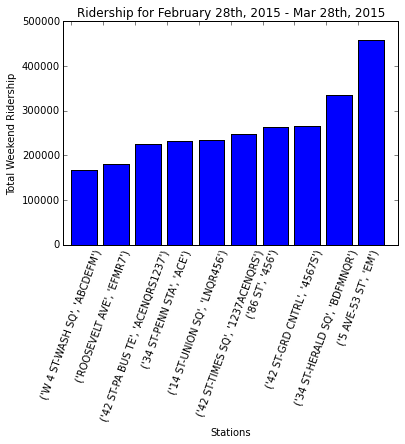

In [136]:
indices = range(len(tot_weekend_ridership[-10:]))
plt.bar(indices, tot_weekend_ridership[-10:])
plt.xticks(indices, weekend_station_name[-10:], rotation=70)
plt.xlim(-0.25,10.25)
plt.xlabel("Stations")
plt.ylabel("Total Weekend Ridership")
plt.title("Ridership for February 28th, 2015 - Mar 28th, 2015")